In [1]:
from thinkdsp import read_wave

wave = read_wave('000_bunyi_siul.wav')
wave.make_audio()

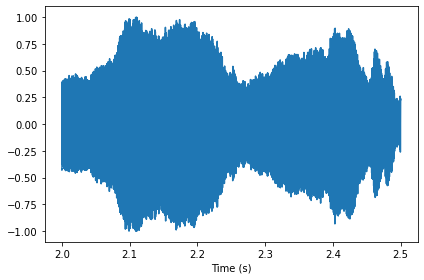

In [2]:
from thinkdsp import decorate

start = 2.0
duration = 0.5
segment = wave.segment(start, duration)
segment.plot()
decorate(xlabel='Time (s)')

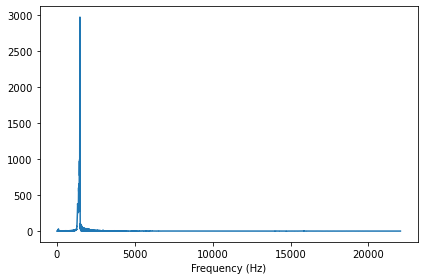

In [3]:
spectrum = segment.make_spectrum()
spectrum.plot()
decorate(xlabel='Frequency (Hz)')

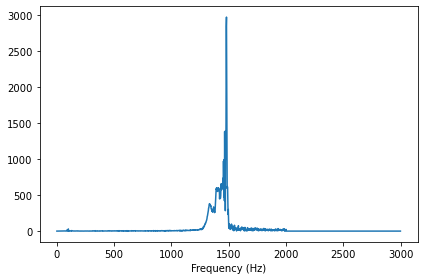

In [4]:
spectrum.low_pass(2000)
spectrum.plot(high=3000)
decorate(xlabel='Frequency (Hz)')

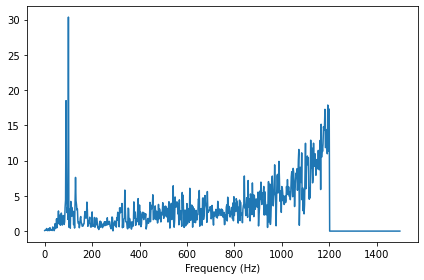

In [5]:
spectrum.low_pass(1200)
spectrum.plot(high=1500)
decorate(xlabel='Frequency (Hz)')

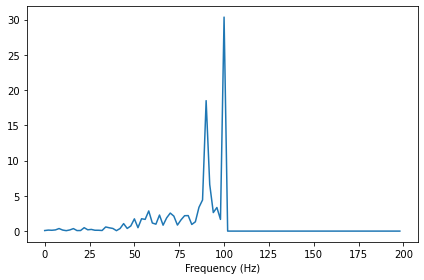

In [6]:
spectrum.low_pass(100)
spectrum.plot(high=200)
decorate(xlabel='Frequency (Hz)')

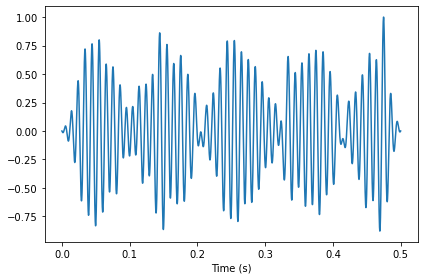

In [7]:
filtered = spectrum.make_wave()
filtered.normalize()
filtered.apodize()
filtered.plot()
decorate(xlabel='Time (s)')

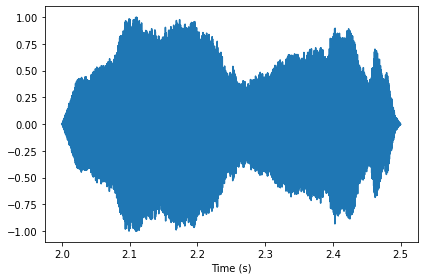

In [8]:
segment.normalize()
segment.apodize()
segment.plot()
decorate(xlabel='Time (s)')

In [9]:
segment.make_audio()

In [10]:
filtered.make_audio()

In [11]:
import matplotlib.pyplot as plt
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    """Selects a segment from the wave and filters it.
    
    Plots the spectrum and displays an Audio widget.
    
    wave: Wave object
    start: time in s
    duration: time in s
    cutoff: frequency in Hz
    """
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(color='0.7')
    spectrum.low_pass(cutoff)
    spectrum.plot(color='#045a8d')
    decorate(xlabel='Frequency (Hz)')
    plt.show()
    
    audio = spectrum.make_wave().make_audio()
    display(audio)

In [13]:
from ipywidgets import interact, fixed

wave = read_wave('000_bunyi_siul.wav')
interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 10000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…